In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display settings for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# Sample data as a dictionary for demonstration purposes
data = {
    'GDP_per_capita': [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000],
    'Health_expenditure': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100],
    'Education_index': [0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97],
    'Life_expectancy': [65, 70, 75, 78, 80, 82, 83, 84, 85, 86]
}

In [4]:
# Convert dictionary to DataFrame
df = pd.DataFrame(data)
df

,GDP_per_capita,Health_expenditure,Education_index,Life_expectancy
0,5000,200,0.60,65
1,10000,300,0.70,70
2,15000,400,0.80,75
3,20000,500,0.85,78
4,25000,600,0.90,80
5,30000,700,0.92,82
6,35000,800,0.94,83
7,40000,900,0.95,84
8,45000,1000,0.96,85
9,50000,1100,0.97,86


In [5]:
# Define independent variables (features) and the dependent variable (target)
X = df[['GDP_per_capita', 'Health_expenditure', 'Education_index']]
y = df['Life_expectancy']

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [9.56689200e-05 1.91338341e-06 4.47345151e+01]
Intercept: 37.74158726273236


In [9]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [10]:
# Print predictions
print('Predicted values:', y_pred)
print('Actual values:', y_test.values)

Predicted values: [84.99373658 70.01301107]
Actual values: [85 70]


In [11]:
# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 0.0001042592488509665
R^2 Score: 0.9999981465022426


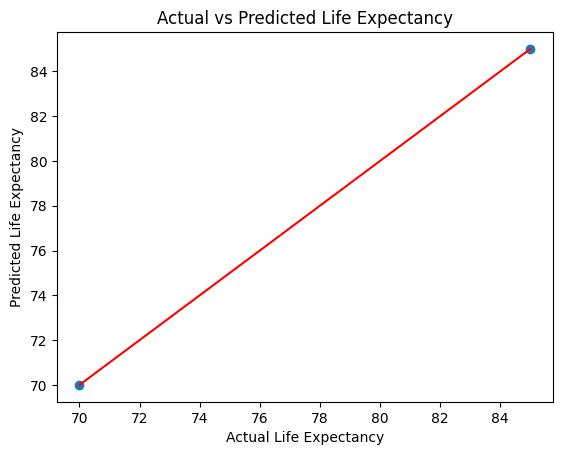

In [13]:
# Visualize actual vs predicted life expectancy
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.show()

In [14]:
# Creating a new sample for testing
new_sample = {
    'GDP_per_capita': [30000],
    'Health_expenditure': [750],
    'Education_index': [0.9]
}

new_sample_df = pd.DataFrame(new_sample)

In [15]:
# Predicting life expectancy for the new sample
new_pred = model.predict(new_sample_df)

print('New Sample Prediction:')
print(f'GDP per Capita: {new_sample["GDP_per_capita"][0]}, Health Expenditure: {new_sample["Health_expenditure"][0]}, Education Index: {new_sample["Education_index"][0]}')
print(f'Predicted Life Expectancy: {new_pred[0]}')

New Sample Prediction:
GDP per Capita: 30000, Health Expenditure: 750, Education Index: 0.9
Predicted Life Expectancy: 80.87415352425002
